<a href="https://colab.research.google.com/github/LGustavoAN/World_Temperature/blob/main/temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib as mat
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/city_temperature.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [5]:
df.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

# Os valores null só existem na coluna "state", que não é uma informação essencial.

# Verificando os países únicos analisados.

In [6]:
print(df['Country'].unique())
df['Region'].unique()

['Algeria' 'Burundi' 'Benin' 'Central African Republic' 'Congo' 'Egypt'
 'Ethiopia' 'Gabon' 'Gambia' 'Guinea' 'Guinea-Bissau' 'Ivory Coast'
 'Kenya' 'Morocco' 'Madagascar' 'Mauritania' 'Malawi' 'Mozambique'
 'Namibia' 'Nigeria' 'Senegal' 'Sierra Leone' 'South Africa' 'Togo'
 'Tunisia' 'Tanzania' 'Uganda' 'Zambia' 'Bangladesh' 'China' 'Hong Kong'
 'India' 'Indonesia' 'Japan' 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Malaysia'
 'Mongolia' 'Myanmar (Burma)' 'Nepal' 'North Korea' 'Pakistan'
 'Philippines' 'Singapore' 'South Korea' 'Sri Lanka' 'Taiwan' 'Tajikistan'
 'Thailand' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Albania' 'Austria' 'Belarus' 'Belgium' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Georgia' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Latvia' 'Macedonia' 'The Netherlands' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Serbia-Montenegro' 'Slovakia' 'Spain' 'Sweden'
 'Switzerland' 'Ukraine' 'United Kingdom' 

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [7]:
a = df.groupby('Region')['Country'].unique()
a

Region
Africa                               [Algeria, Burundi, Benin, Central African Repu...
Asia                                 [Bangladesh, China, Hong Kong, India, Indonesi...
Australia/South Pacific                                       [Australia, New Zealand]
Europe                               [Albania, Austria, Belarus, Belgium, Bulgaria,...
Middle East                          [Bahrain, Israel, Jordan, Kuwait, Lebanon, Oma...
North America                                                     [Canada, Mexico, US]
South/Central America & Carribean    [Argentina, Bahamas, Bermuda, Belize, Bolivia,...
Name: Country, dtype: object

# No total são 125 países diferentes e 321 cidades ao redor do mundo.

In [8]:
print(df['Country'].unique().shape)
df['City'].unique().shape

(125,)


(321,)

# Número de medições para cada país


In [9]:
c = df.groupby('Country').count()
c = pd.DataFrame(c)
print(c)
print('medições no Brasil')
c['City']['Brazil']

            Region  State   City  Month    Day   Year  AvgTemperature
Country                                                              
Albania       9266      0   9266   9266   9266   9266            9266
Algeria       9266      0   9266   9266   9266   9266            9266
Argentina     9266      0   9266   9266   9266   9266            9266
Australia    46330      0  46330  46330  46330  46330           46330
Austria       9266      0   9266   9266   9266   9266            9266
...            ...    ...    ...    ...    ...    ...             ...
Uzbekistan    9266      0   9266   9266   9266   9266            9266
Venezuela     9265      0   9265   9265   9265   9265            9265
Vietnam       9266      0   9266   9266   9266   9266            9266
Yugoslavia    9266      0   9266   9266   9266   9266            9266
Zambia        6962      0   6962   6962   6962   6962            6962

[125 rows x 7 columns]
medições no Brasil


27797

# Criando uma coluna para colocar os valores convertidos em Celsius, que é o padrão usado na maioria dos países.

In [10]:
celsius = [np.round((f-32)*(5/9), 2) for f in df['AvgTemperature']]

In [11]:
df['AvgCelsius'] = celsius
df = df.rename(columns={'AvgTemperature': 'AvgFahrenheit'})
df.head()

,Region,Country,State,City,Month,Day,Year,AvgFahrenheit,AvgCelsius
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.83


In [12]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])

In [13]:
df.groupby('Year').count()

,Region,Country,State,City,Month,Day,AvgFahrenheit,AvgCelsius
Year,,,,,,,,
200,89,89,0,89,89,89,89,89
201,351,351,0,351,351,351,351,351
1995,118616,118616,58400,118616,118616,118616,118616,118616
1996,118951,118951,58560,118951,118951,118951,118951,118951
1997,118656,118656,58400,118656,118656,118656,118656,118656
1998,119082,119082,58400,119082,119082,119082,119082,119082
1999,119355,119355,58400,119355,119355,119355,119355,119355
2000,119682,119682,58560,119682,119682,119682,119682,119682
2001,119355,119355,58400,119355,119355,119355,119355,119355


# O intervalo de tempo analisado vai de 1995 a 2020 sendo diferente entre os países, alguns com mais dados que outros como visto anteriormente. Existem valores que parecem ter sido digitados errados (201, 200).

In [14]:
print(df.shape)
i = df[(df.Year == 200) | (df.Year == 201)].index
df = df.drop(i)


(2906327, 9)


# Optei por excluir as linhas com valores de ano errados, pois são apenas 440 no meio de quase 3 milhões.

In [15]:
values = sorted(df['AvgCelsius'].values)
print(max(values))
print(min(values))
print(np.percentile(values, 99))
print(np.percentile(values, 1))

43.33
-72.78
33.56
-72.78


In [16]:
p = []
for i in np.arange(0.0, 3):
  p.append(np.percentile(values, i))

print(max(p))
print(min(p))

-72.78
-72.78


In [17]:
df['AvgCelsius'] = df['AvgCelsius'].replace(to_replace = -72.78, value = df['AvgCelsius'].mean())

# Aparentemente existe uma grande repetição do valor -72.78, que pode ser um padrão para dados que ficaram faltando. A decisão é de substituir pelo valor médio.

In [18]:
i2 = df[df.Year == 2020].index
df['Month'].loc[i2].unique()

array([1, 2, 3, 4, 5])

# 2020 possui bem menos valores do que os outros anos. O trecho de codigo anterior mostra que foram obtidos dados apenas dos cinco primeiro meses do ano, o que pode causar uma interpretação errada ao analisar o ano inteiro.

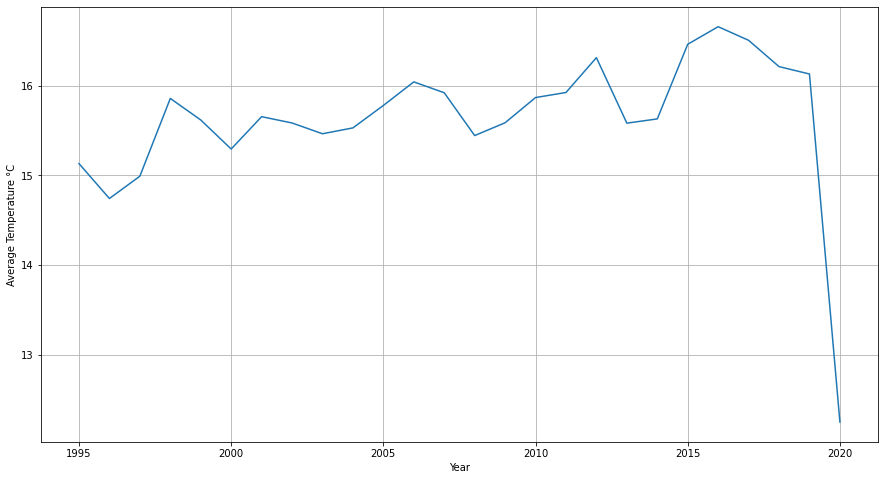

In [43]:
plt.subplots(figsize=(15,8))
years = df['Year'].unique()
y = pd.DataFrame(df.groupby('Year')['AvgCelsius'].mean())
plt.plot(years, y)
plt.xlabel('Year')
plt.ylabel('Average Temperature °C')
plt.grid(axis='both')
plt.show()

# O gráfico deixa claro que o planeta terra está ficando mais quente. Um detalhe é que o ano de 2020 apresenta um boa queda o que mostra que os primeiros meses do ano no geral são mais frios, já que como mostrado anteriormente apenas os primeiros cinco meses de 2020 foram registrados. A queda na média se dá provavelmente porque no hemisfério norte é inverno no início do ano, e algumas regiões atingem temperaturas inferiores a -30 ºC o que puxa a média para baixo mesmo sendo verão no hemisfério sul.

In [30]:
def plot_region(df, region):
  i = df[df.Region == region].index
  df_r = df.loc[i]
  df_r = pd.DataFrame(df_r.groupby('Year')['AvgCelsius'].mean())
  plt.subplots(figsize=(15,8))
  plt.xlabel('Year')
  plt.ylabel('Average Temperature °C')
  plt.title(region)
  years = df['Year'].unique()
  years = np.delete(years, 25)
  df_r = df_r.drop(2020)
  plt.xticks(range(1995, 2020, 4))
  plt.scatter(years, df_r)
  z = np.polyfit(years, df_r['AvgCelsius'].values, 1)
  p = np.poly1d(z)
  plt.plot(years,p(years),"r--")
  plt.grid(axis='both')
  plt.show()

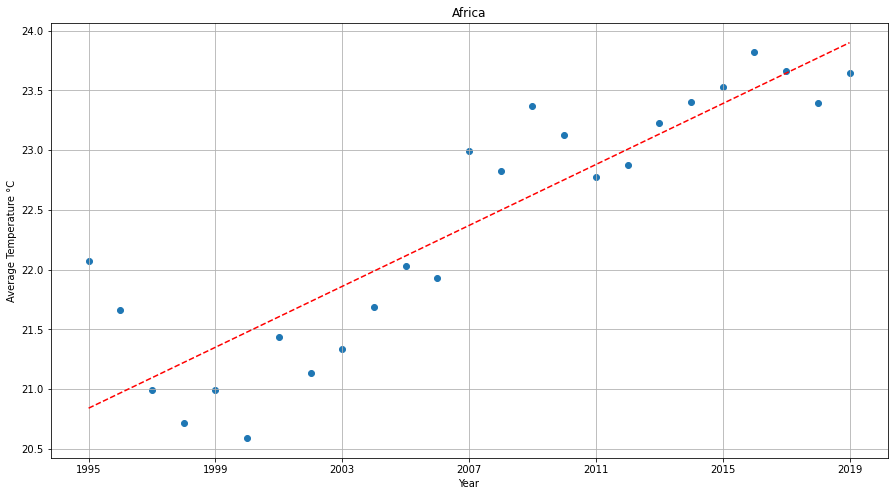

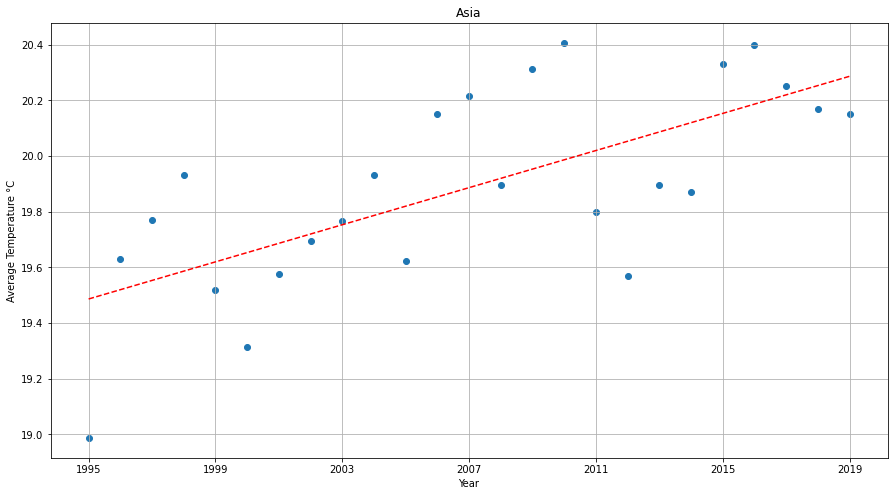

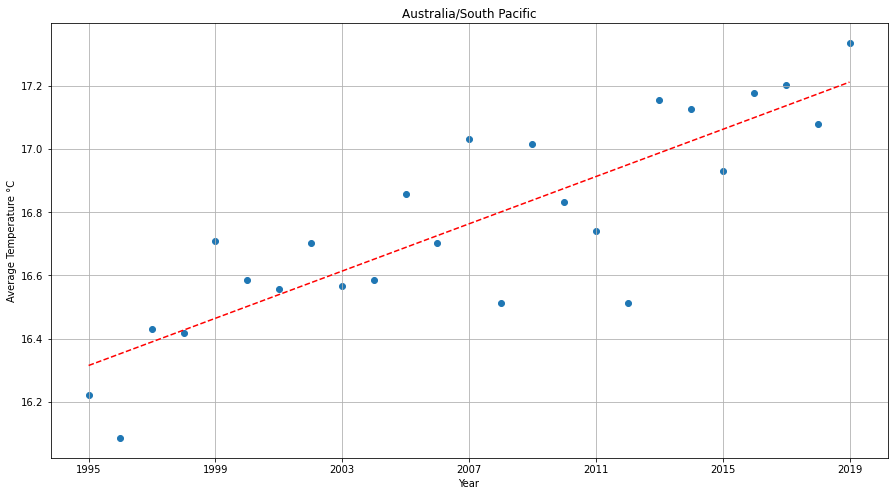

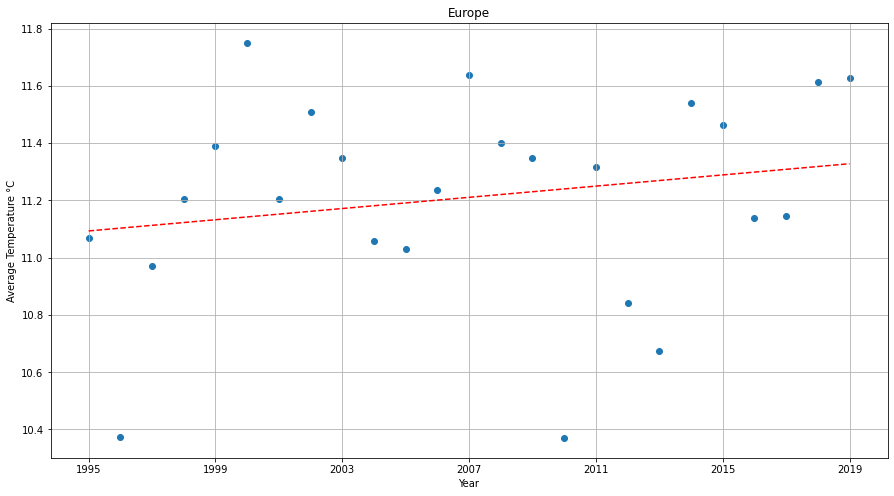

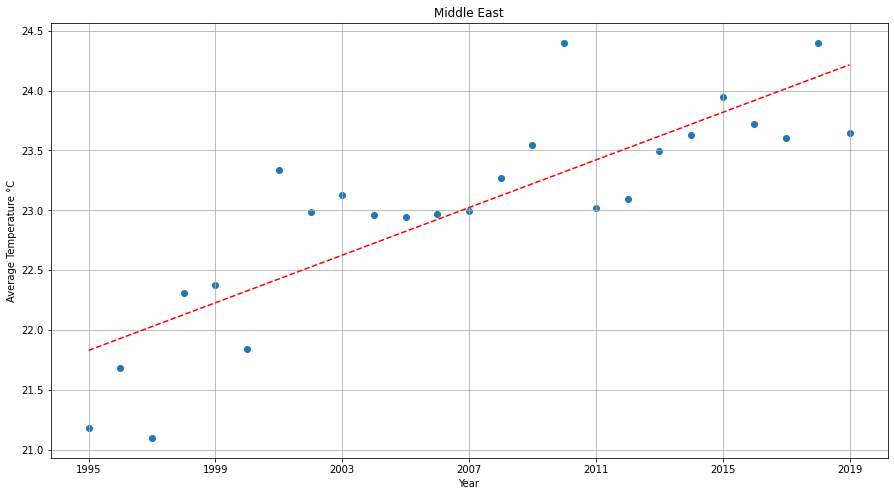

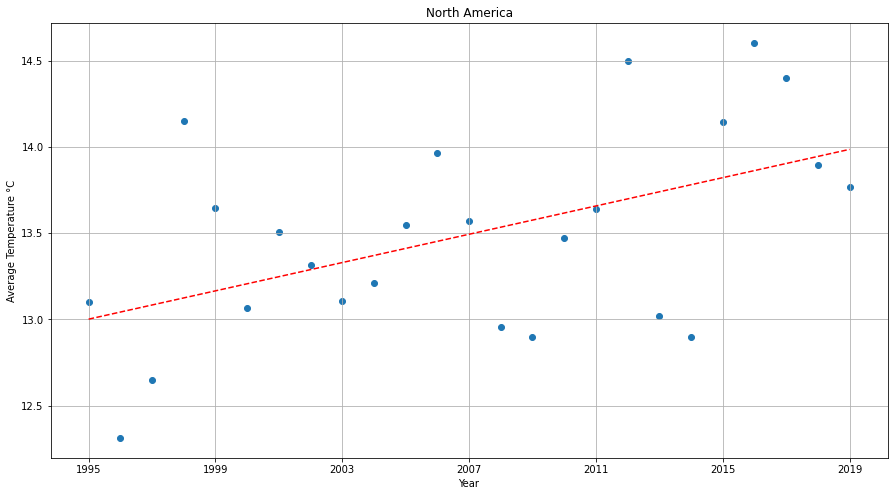

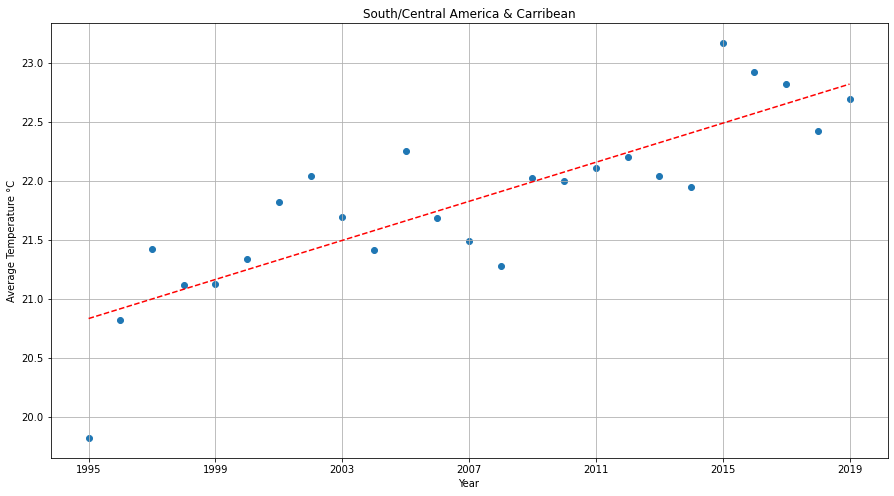

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [39]:
for i in df['Region'].unique():
  plot_region(df, i)

# No geral todas as regiões mostram uma tendência no aumento da temperatura média.

Text(0, 0.5, 'Average Temperature °C')

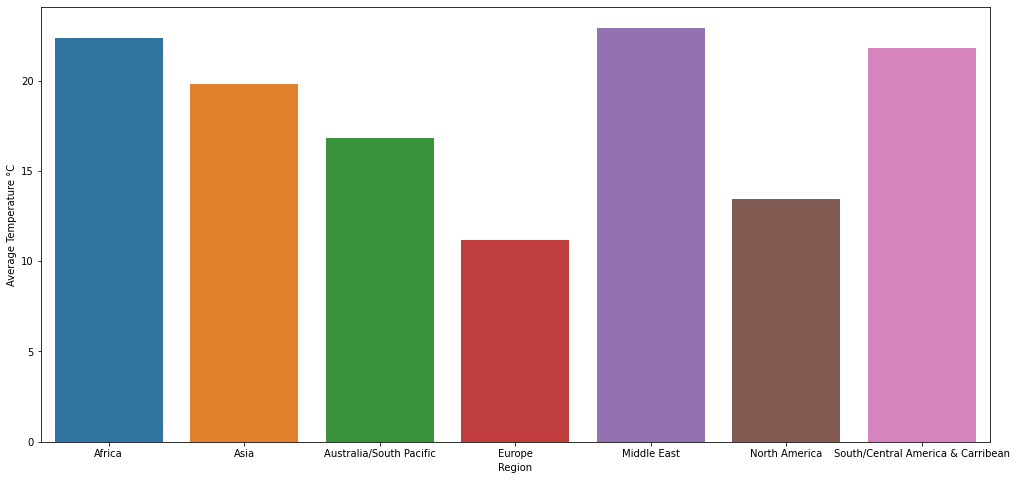

In [32]:

plt.subplots(figsize=(17,8))
sns.barplot(x = df['Region'].unique(), y = df.groupby('Region')['AvgCelsius'].mean(), data=df)
plt.xlabel('Region')
plt.ylabel('Average Temperature °C')

Text(0, 0.5, 'Standar Deviation °C')

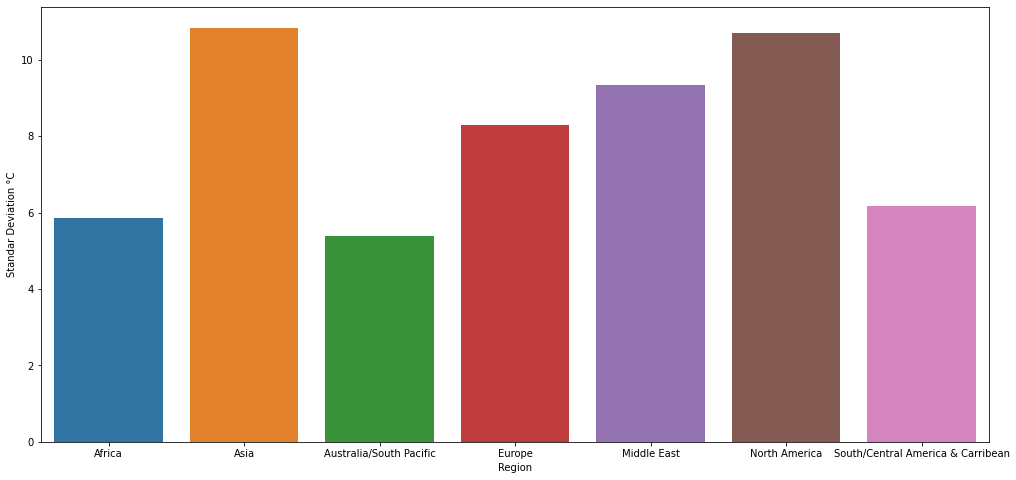

In [33]:
plt.subplots(figsize=(17,8))
sns.barplot(x = df['Region'].unique(), y = df.groupby('Region')['AvgCelsius'].std(), data=df)
plt.xlabel('Region')
plt.ylabel('Standard Deviation °C')

# Os gráficos anteriores mostram que Europa e América do Norte são regiões mais frias na média e o Oriente Médio mais quente. Enquanto que Asia e América do Norte apresentam as maiores variações de temperatura.

In [40]:
i_br = df[df.Country == 'Brazil'].index
df_br = df.loc[i_br]
df_br['City'].unique()

array(['Brasilia', 'Rio de Janeiro', 'Sao Paulo'], dtype=object)

In [41]:
i_b = df_br[df_br.City == 'Brasilia']
i_sp = df_br[df_br.City == 'Sao Paulo']
i_rj = df_br[df_br.City == 'Rio de Janeiro']


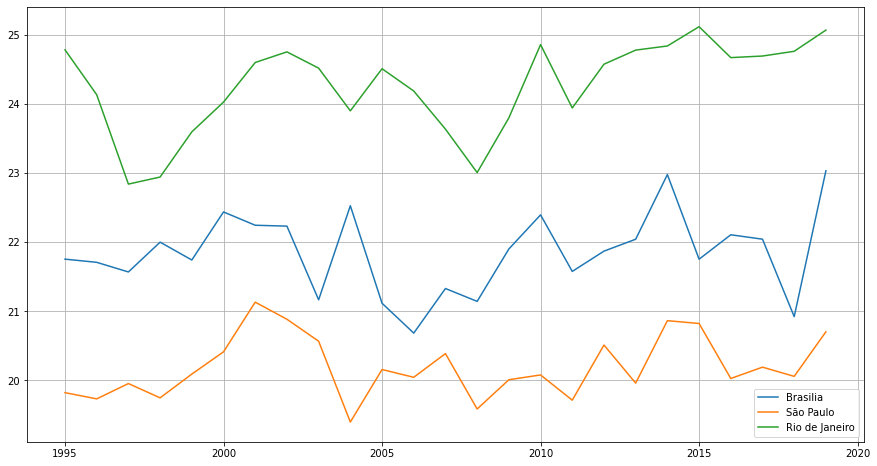

In [42]:
years = np.delete(years, 25)
i_b = pd.DataFrame(i_b.groupby('Year')['AvgCelsius'].mean())
i_sp = pd.DataFrame(i_sp.groupby('Year')['AvgCelsius'].mean())
i_rj = pd.DataFrame(i_rj.groupby('Year')['AvgCelsius'].mean())

i_b = i_b.drop(2020)
i_sp = i_sp.drop(2020)
i_rj = i_rj.drop(2020)
plt.subplots(figsize=(15,8))
plt.plot(years, i_b)
plt.plot(years, i_sp)
plt.plot(years, i_rj)
plt.legend(['Brasilia', 'São Paulo', 'Rio de Janeiro'])
plt.grid(axis='both')
plt.show()

# As três cidades brasileiras presentes neste dataset são São Paulo, Brasilia e Rio de Janeiro. Rio de Janeiro sendo a mais quente entre elas a São Paulo a mais fria.

In [ ]:
std_c = pd.DataFrame(df.groupby('City')['AvgCelsius'].std().sort_values())
std_c


,AvgCelsius
City,
Bogota,1.019004
Quito,1.256221
Singapore,1.458329
San Jose,1.640554
Panama City,1.686668
...,...
Fargo,13.391717
Regina,13.401033
Winnipeg,14.113700


In [ ]:
i_col = df[(df.City == 'Bogota') & (df.Year == '2019')].index
i_col = df.loc[i_col]
i_col

i_mon = df[(df.City == 'Ulan-bator') & (df.Year == '2019')].index
i_mon = df.loc[i_mon]



# Analisando os extremos, Bogota na Colombia apresenta a menor variação ao decorrer do ano enquanto que Ulan-bator, na Mongolia, tem a maior.

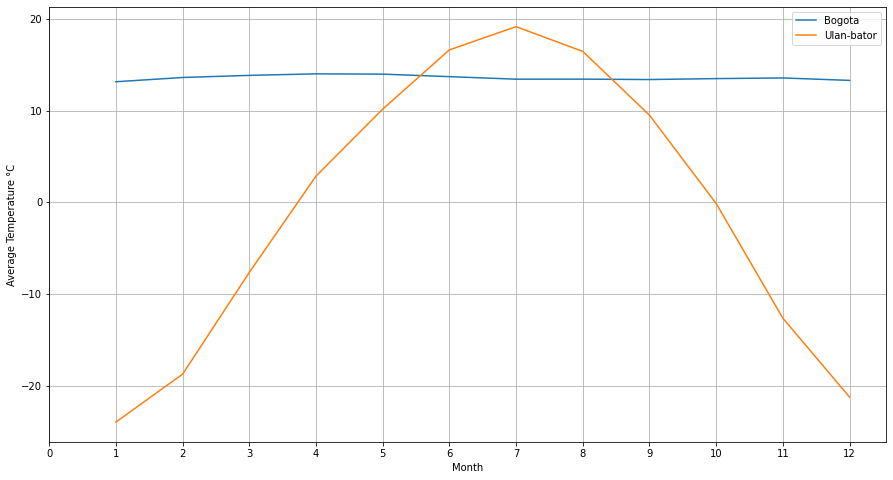

In [ ]:
plt.subplots(figsize=(15,8))
plt.plot(df['Month'].unique(), i_col.groupby('Month')['AvgCelsius'].mean())
plt.plot(df['Month'].unique(), i_mon.groupby('Month')['AvgCelsius'].mean())
plt.legend(['Bogota', 'Ulan-bator'])
plt.grid(axis='both')
plt.xlabel('Month')
plt.ylabel('Average Temperature °C')
plt.xticks(range(0, 13))
plt.show()

# O ano de 2019 foi usado para a análise. O gráfico mostra como que em Bogota a temperatura quase não muda durante o ano. Por outro lado Ulan-bator no inverno pode atingir temperaturas médias inferiores a -20°C e um verão próximo a uma média de 20°C. Uma amplitude de temperatura média de mais de 40°C.

In [ ]:
model = LinearRegression()
model.fit(years.reshape((-1, 1)), df.groupby('Year')['AvgCelsius'].mean().drop(2020))

LinearRegression()

In [ ]:
x = np.array(range(2020,2061, 10))
pred = model.predict(x.reshape(-1, 1))
pred

array([16.40522358, 16.90320235, 17.40118112, 17.89915989, 18.39713866])

# Um modelo básico de regressão linear para tentar prever um valor aproximado para as próximas décadas mostra como em 2060 a temperatura média pode atingir 18.3°C segundo os dados coletados.